In [1]:
import pickle
import yaml
from pprint import pprint

% matplotlib inline
import matplotlib.pyplot as plt


In [2]:
def err2logerr2lowerupper(y, err):
    import numpy as np
    assert len(y) == len(err)
    
    upper = []
    lower = []

    for yi, erri in zip(y, err):
        logerr = 0.434 * erri / yi
        u = 10 ** (logerr + np.log10(yi)) - yi
        l = yi - 10 ** (np.log10(yi) - logerr)
        print("yi:", yi, "erri:", erri, "logerr:", logerr, "l:", l, "u:", u)
        upper.append(u)
        lower.append(l)
        
    return lower, upper
        
        


In [3]:
plots_b16 = yaml.load(open('dump/n_step_item_b16.yaml', 'rt'))["plots"]
plots_b32 = yaml.load(open('dump/n_step_item_b32.yaml', 'rt'))["plots"]
pprint(plots_b16)
pprint(plots_b32)

{'N': [10000, 100000, 1000000, 10000000],
 'N_est': [10000.0,
           10722.672220103232,
           11497.569953977356,
           12328.467394420659,
           13219.411484660288,
           14174.741629268048,
           15199.11082952933,
           16297.508346206434,
           17475.28400007683,
           18738.17422860383,
           20092.33002565046,
           21544.346900318822,
           23101.29700083158,
           24770.76355991709,
           26560.87782946684,
           28480.35868435805,
           30538.555088334124,
           32745.491628777316,
           35111.917342151275,
           37649.35806792471,
           40370.17258596558,
           43287.612810830615,
           46415.88833612782,
           49770.23564332114,
           53366.99231206313,
           57223.676593502205,
           61359.072734131754,
           65793.32246575682,
           70548.02310718645,
           75646.3327554629,
           81113.08307896872,
           86974.900261778

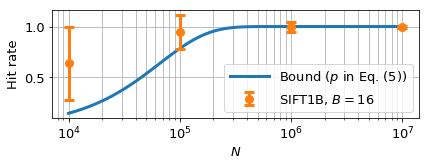

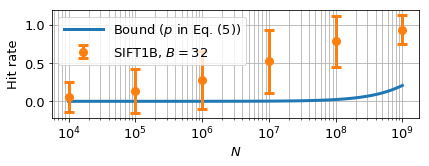

In [16]:
for B in ["16", "32"]:
    if B == "16":
        plots = plots_b16
    elif B == "32":
        plots = plots_b32
            
    
    # Params
    fontsize = 13
    linewidth = 3
    markersize = 8

    plt.figure(figsize=[6, 2])

    # Plot
    plt.plot(plots['N_est'], plots['hit_rate_est_mean'], "-", lw=linewidth, ms=markersize, label='Bound ($p$ in Eq. (5))', color='C0')
    plt.errorbar(plots['N'], plots['hit_rate_act_mean'], plots['hit_rate_act_std'],
                 fmt='o', lw=linewidth, ms=markersize, color='C1', capsize=5, capthick=3, label='SIFT1B, $B='+str(B)+"$", zorder=3)        

    # Texts
    plt.xlabel('$N$', fontsize=fontsize)
    plt.ylabel('Hit rate', fontsize=fontsize)
    plt.tick_params(labelsize=fontsize)

    # Legend
    # handlelength: if 0, delete line in legend.
    plt.legend(fontsize=fontsize, handlelength=3, loc='best')

    # Grid
    # which='both': show more grids (useful for log scaling)
    plt.grid(True, which='both')#, color='darkgray')

    # Log
    plt.xscale('log')
#    plt.yscale('log')
    

    # Ranges
#    plt.ylim([0.01, 10**4])

    # Write
    # Adjust white spaces when the text size is big. This is manually adjusted
    # http://d.hatena.ne.jp/nohzen/20130922/1379807776
    plt.subplots_adjust(left=0.14, bottom=0.24, right=0.99, top=0.99, wspace=None, hspace=None)

    if B == "16":
        plt.savefig("n_p_b16.pdf")
    elif B == "32":
        plt.savefig("n_p_b32.pdf")


yi: 2.8045 erri: 4.651674940276889 logerr: 0.7198527096024853 l: 2.26993227445 u: 11.9087344025
yi: 19.698 erri: 48.40771421994639 logerr: 1.0665523388900768 l: 18.0080658033 u: 209.903368358
yi: 189.7361 erri: 443.7461853997057 logerr: 1.0150195163886697 l: 171.407451056 u: 1774.39053874
yi: 1995.0633 erri: 4886.099029828715 logerr: 1.0629071162532349 l: 1822.45981373 u: 21065.1752671
yi: 1.226 erri: 1.1960451496494604 logerr: 0.42339608070788404 l: 0.763518473882 u: 2.02402387148
yi: 3.0305 erri: 13.833841467575086 logerr: 1.9811539999761052 l: 2.99885097843 u: 287.150042519
yi: 18.5117 erri: 107.78700785860048 logerr: 2.5270267674299283 l: 18.4566928004 u: 6211.27347533
yi: 194.0631 erri: 1222.636335595499 logerr: 2.7342867842905045 l: 193.705286946 u: 105057.78951
yi: 1860.7096 erri: 11703.472346789556 logerr: 2.7297687927802747 l: 1857.24295153 u: 996867.670535
yi: 18404.4285 erri: 115704.26846521042 logerr: 2.7284548669306044 l: 18370.0357051 u: 9830256.89322


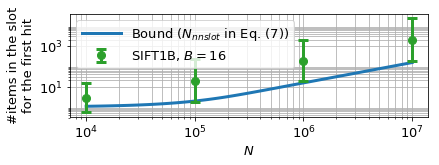

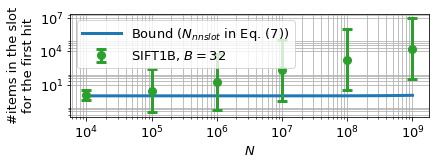

In [19]:
for B in ["16", "32"]:
    if B == "16":
        plots = plots_b16
    elif B == "32":
        plots = plots_b32
            
    
    # Params
    fontsize = 13
    linewidth = 3
    markersize = 8

    plt.figure(figsize=[6, 2])

    # Plot
    plt.plot(plots['N_est'], plots['item_est_mean'], "-", lw=linewidth, ms=markersize, label='Bound ($N_{nnslot}$ in Eq. (7))', color='C0')
    plt.errorbar(plots['N'], plots['item_act_mean'], err2logerr2lowerupper(plots['item_act_mean'], plots['item_act_std']),  #plots['item_act_std'],
                 fmt='o', lw=linewidth, ms=markersize, color='C2', capsize=5, capthick=3, label='SIFT1B, $B='+str(B)+"$", zorder=3)        

    # Texts
    plt.xlabel('$N$', fontsize=fontsize)
    plt.ylabel('#items in the slot\nfor the first hit', fontsize=fontsize)
    plt.tick_params(labelsize=fontsize)

    # Legend
    # handlelength: if 0, delete line in legend.
    plt.legend(fontsize=fontsize, handlelength=3, loc='best')

    # Grid
    # which='both': show more grids (useful for log scaling)
    plt.grid(True, which='both')#, color='darkgray')

    # Log
    plt.xscale('log')
    plt.yscale('log')

    # Ranges
#    plt.ylim([0.01, 10**4])

    # Write
    # Adjust white spaces when the text size is big. This is manually adjusted
    # http://d.hatena.ne.jp/nohzen/20130922/1379807776
    plt.subplots_adjust(left=0.16, bottom=0.24, right=0.99, top=0.96, wspace=None, hspace=None)

    if B == "16":
        plt.savefig("n_nhash_b16.pdf")
    elif B == "32":
        plt.savefig("n_nhash_b32.pdf")


yi: 3.0355 erri: 3.784077133199058 logerr: 0.541027664572028 l: 2.16212134723 u: 7.51463220295
yi: 1.1405 erri: 0.5579961917432771 logerr: 0.21233699887468852 l: 0.441047396991 u: 0.719154599044
yi: 1.0099 erri: 0.11748187094186063 logerr: 0.05048730764310082 l: 0.110835055156 u: 0.124498594728
yi: 1.0004 erri: 0.019995999599919986 logerr: 0.008674793908801753 l: 0.0197841939272 u: 0.0201833454878
yi: 21012.0132 erri: 61942.711485278276 logerr: 1.2794174707928876 l: 19907.8069674 u: 378826.97128
yi: 1299.5504 erri: 3972.7684795190166 logerr: 1.326752329198816 l: 1238.30960808 u: 26277.3503734
yi: 116.314 erri: 396.56791171752667 logerr: 1.479705570141226 l: 112.459869452 u: 3393.93206657
yi: 14.0909 erri: 46.133326751817926 logerr: 1.4209073806704313 l: 13.5562970485 u: 357.312703822
yi: 2.7792 erri: 6.893057910680862 logerr: 1.0764202408014876 l: 2.54612292445 u: 30.3598490538
yi: 1.2624 erri: 1.4955086893762937 logerr: 0.5141403447317106 l: 0.875982629281 u: 2.86177732938


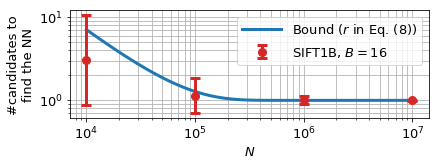

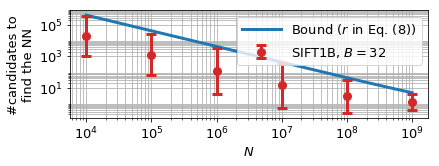

In [21]:
for B in ["16", "32"]:
    if B == "16":
        plots = plots_b16
    elif B == "32":
        plots = plots_b32
            
    
    # Params
    fontsize = 13
    linewidth = 3
    markersize = 8

    plt.figure(figsize=[6, 2])

    # Plot
    plt.plot(plots['N_est'], plots['step_est_mean'], "-", lw=linewidth, ms=markersize, label='Bound ($r$ in Eq. (8))', color='C0')
    plt.errorbar(plots['N'], plots['step_act_mean'], err2logerr2lowerupper(plots['step_act_mean'], plots['step_act_std']),  #plots['item_act_std'],
                 fmt='o', lw=linewidth, ms=markersize, color='C3', capsize=5, capthick=3, label='SIFT1B, $B='+str(B)+"$", zorder=3)        

    # Texts
    plt.xlabel('$N$', fontsize=fontsize)
    plt.ylabel('#candidates to\nfind the NN', fontsize=fontsize)
    plt.tick_params(labelsize=fontsize)

    # Legend
    # handlelength: if 0, delete line in legend.
    plt.legend(fontsize=fontsize, handlelength=3, loc='upper right')

    # Grid
    # which='both': show more grids (useful for log scaling)
    plt.grid(True, which='both')#, color='darkgray')

    # Log
    plt.xscale('log')
    plt.yscale('log')

    # Ranges
#    plt.ylim([0.01, 10**4])

    # Write
    # Adjust white spaces when the text size is big. This is manually adjusted
    # http://d.hatena.ne.jp/nohzen/20130922/1379807776
    plt.subplots_adjust(left=0.16, bottom=0.24, right=0.99, top=0.99, wspace=None, hspace=None)

    if B == "16":
        plt.savefig("n_r_b16.pdf")
    elif B == "32":
        plt.savefig("n_r_b32.pdf")